In [1]:
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as xr
import cv2 as cv
import matplotlib

In [2]:
data_name1 = "test1.tif"
data_name2 = "test2.tif"
data_name3 = "test3.tif"
data_name4 = "test4.tif"
data_name5 = "test5.tif"
data_name6 = "test6.tif"
data_name7 = "test7.tif"
data_name8 = "test8.tif"
data_name9 = "test9.tif"
data_name10 = "test10.tif"
data_name11 = "test11.tif"
data_name12 = "test12.tif"
data_name13 = "test13.tif"


CMAP = 'gray'
matplotlib.rc('image', cmap=CMAP)



tiff1 = rasterio.open(data_name1)
tiff2 = rasterio.open(data_name2)
tiff3 = rasterio.open(data_name3)
tiff4 = rasterio.open(data_name4)
tiff5 = rasterio.open(data_name5)
tiff6 = rasterio.open(data_name6)
tiff7 = rasterio.open(data_name7)
tiff8 = rasterio.open(data_name8)
tiff9 = rasterio.open(data_name9)
tiff10 = rasterio.open(data_name10)
tiff11 = rasterio.open(data_name11)
tiff12 = rasterio.open(data_name12)
tiff13 = rasterio.open(data_name13)






#rasterio.plot.show(tiff1, title = "My Data")
#rasterio.plot.show(tiff2, title = "My Data")

#np.shape(tiff1)


In [3]:
a = tiff1.read(1)
b = tiff2.read(1)
c = tiff3.read(1)
d = tiff4.read(1)
e = tiff5.read(1)
f = tiff6.read(1)
g = tiff7.read(1)
h = tiff8.read(1)
i = tiff9.read(1)
j = tiff10.read(1)
k = tiff11.read(1)
l = tiff12.read(1)
m = tiff13.read(1)



In [4]:


flow1 = cv.calcOpticalFlowFarneback(a, b, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow2 = cv.calcOpticalFlowFarneback(b, c, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)



flow3 = cv.calcOpticalFlowFarneback(c, d, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow4 = cv.calcOpticalFlowFarneback(d, e, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow5 = cv.calcOpticalFlowFarneback(e, f, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow6 = cv.calcOpticalFlowFarneback(f, g, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow7 = cv.calcOpticalFlowFarneback(g, h, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow8 = cv.calcOpticalFlowFarneback(h, i, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow9 = cv.calcOpticalFlowFarneback(i, j, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow10 = cv.calcOpticalFlowFarneback(j, k, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


#flow11 = cv.calcOpticalFlowFarneback(k, l, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
#   poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


avg = (flow1 + flow2 + flow3 + flow4 + flow5 + flow6 + flow7 + flow8 + flow9 + flow10)/10


In [5]:
def plot_flow_vectors(flow):
    # Computes the magnitude and angle of the 2D vectors 
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])

    # Creates an image filled with zero 
    # intensities with the same dimensions  
    # as the frame 
    hsv_shape = a.shape + (3,)
    hsv = np.zeros(shape=hsv_shape, dtype=np.uint8) 

    # Sets image hue according to the optical flow  
    # direction 
    hsv[..., 0] = angle * 180 / np.pi / 2

    # Sets image saturation to maximum 
    hsv[..., 1] = 255

    # Sets image value according to the optical flow 
    # magnitude (normalized) 
    hsv[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation 
    rgb = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    
    fig = plt.figure()
    plt.title('Optical flow field')
    plt.imshow(rgb)


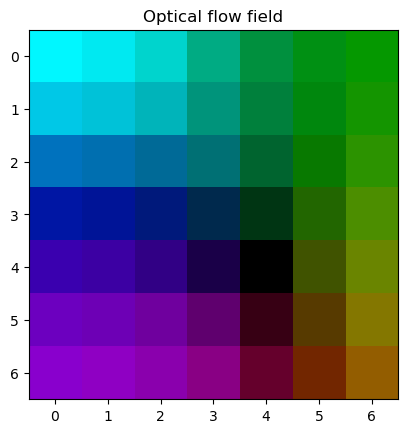

In [6]:
plot_flow_vectors(avg)

In [7]:
def remap_image(image: np.ndarray, flow: np.ndarray) -> np.ndarray:
    """Takes an image and warps it forwards in time according to the flow field.
    
    Args:
        image: The grayscale image to warp.
        flow: A 3D array.  The first two dimensions must be the same size as the first two
            dimensions of the image.  The third dimension represented the x and y displacement.
            
    Returns:  Warped image.
    """
    # Adapted from https://github.com/opencv/opencv/issues/11068
    height, width = flow.shape[:2]
    remap = -flow.copy()
    remap[:,:, 0] += np.arange(width)  # x map
    remap[:,:, 1] += np.arange(height)[:, np.newaxis]  # y map
    return cv.remap(src=image, map1=remap, map2=None, interpolation=cv.INTER_LINEAR, borderMode=cv.BORDER_REPLICATE)

In [8]:
remapped_image = remap_image(k, avg)

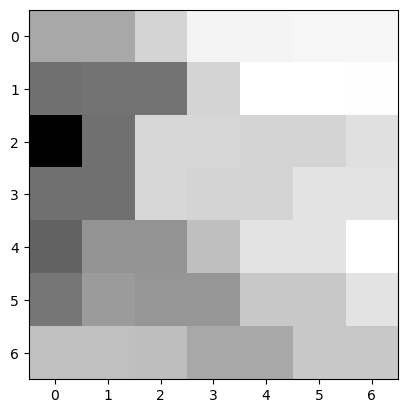

In [9]:
plt.figure()

plt.imshow(remapped_image, cmap='Greys')

plt.imshow(m, cmap="Greys")

In [10]:
#flow11 = cv.calcOpticalFlowFarneback(k, remapped_image, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
#  poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


#avg = (flow1 + flow2 + flow3 + flow4 + flow5 + flow6 + flow7 + flow8 + flow9 + flow10 + flow11)/11






In [11]:
remapped_image1 = remap_image(remapped_image, avg)

In [12]:
remapped_image1

array([[162.7    , 162.70001, 162.70001, 162.70001, 156.53691, 158.5    ,
        158.5    ],
       [162.7    , 162.7    , 162.7    , 162.70001, 156.36621, 158.5    ,
        158.5    ],
       [162.7    , 162.7    , 162.7    , 162.70001, 156.28085, 158.5    ,
        158.5    ],
       [161.65898, 161.55487, 161.97128, 162.7    , 156.14297, 158.5    ,
        158.5    ],
       [188.4    , 188.4    , 188.4    , 187.54716, 150.25928, 146.78828,
        146.09375],
       [188.4    , 188.4    , 188.4    , 188.4    , 161.27032, 150.53516,
        147.8336 ],
       [188.4    , 188.4    , 188.4    , 188.4    , 161.27032, 151.5    ,
        151.5    ]], dtype=float32)